<a href="https://colab.research.google.com/github/TasnimJumara/TableAssignmentFirst/blob/master/Experiment2_c(2ndDataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import cv2
from customDataset import DigitFindingDataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
print(device)

cuda


In [ ]:
import pandas as pd

In [ ]:
import os
from skimage import io

In [ ]:
dataset1.to_csv('updated_dataset.csv',index=False)

In [ ]:
batch_size=100
num_iteration=1000
input_dimension=28*28
num_hiddennodes=20
output_dimension=10
learning_rate=.02
hidden_layers=4
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
train_dataset = (r "/content/drive/MyDrive/Assignment/Dataset_2/verification_train.csv" train=True, transform=transforms.ToTensor())

test_dataset = (r "/content/drive/MyDrive/Assignment/Dataset_2/verification_test.csv" train=True, transform=transforms.ToTensor())


num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hiddennodes):
        super().__init__()
        self.linear_1 = nn.Linear(input_size, num_hiddennodes)
        self.leakyrelu_1 = nn.LeakyReLU()

        #self.linear_2 = nn.Linear(num_hiddennodes, num_hiddennodes)
        #self.softshrink_1 = nn.Softshrink()
  
        #self.linear_3 = nn.Linear(num_hiddennodes, num_hiddennodes)
       # self.hardtanh_1 = nn.Hardtanh()

        self.linear_4 = nn.Linear(num_hiddennodes,num_hiddennodes)
        self.logsigmoid_1 = nn.LogSigmoid()

        self.linear_out = nn.Linear(num_hiddennodes, num_classes)

    def forward(self, x):
       
        out = self.linear_1(x)
        out = self.leakyrelu_1(out)
        
        #out  = self.linear_2(out)
        #out = self.softshrink_1(out)

        #out  = self.linear_3(out)
        #out = self.hardtanh_1(out)

        out  = self.linear_4(out)
        out = self.logsigmoid_1(out)

        probas  = self.linear_out(out)
        return probas

model = DeepNeuralNetworkModel(input_size = input_dimension,
                               num_classes = output_dimension,
                               num_hiddennodes = num_hiddennodes)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss = []
iter = 0
for epoch in range(num_epoch):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)


                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

[2.299708366394043, 2.0467870235443115, 1.2123138904571533, 0.6822490096092224, 0.4486219882965088, 0.24277591705322266, 0.33326977491378784, 0.2884293794631958, 0.29108020663261414, 0.31275543570518494, 0.3199012279510498, 0.32454678416252136, 0.2716137766838074, 0.4110594093799591, 0.21572823822498322, 0.2877638339996338, 0.18067780137062073, 0.3477727770805359, 0.30747485160827637]


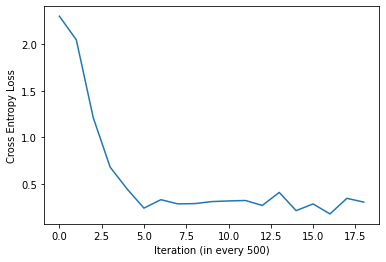

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()